In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [555]:
df = pd.read_csv('/Users/JorgeArthur/Documents/Banco de dados/logica_prog/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [556]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [557]:
df=df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [558]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [559]:
df.duplicated().sum()

29

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [561]:
#defining categorical(qualitative) and numerical(quantitative) variables

catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

catvars, numvars


(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [562]:
def uniquevals(col):
    print(f'Details of a particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Value counts of the particular col {col}) is : {df[col].value_counts()}')
    
for col in df.columns:
    uniquevals(col)
    print('-'*75)

Details of a particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of a particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of a particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of a particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080'

In [563]:
' Removing "GB" from RAM i can transform it as an interger same goes with Memory and Weight, and weight i can classify as a float'

df['Ram'] = df['Ram'].astype('str').str.replace('GB', '')
df['Weight'] = df['Weight'].astype('str').str.replace('kg','')

df['Ram'] = df['Ram'].astype('int32')

df['Weight'] = df['Weight'].astype('float32')


In [564]:
df=df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


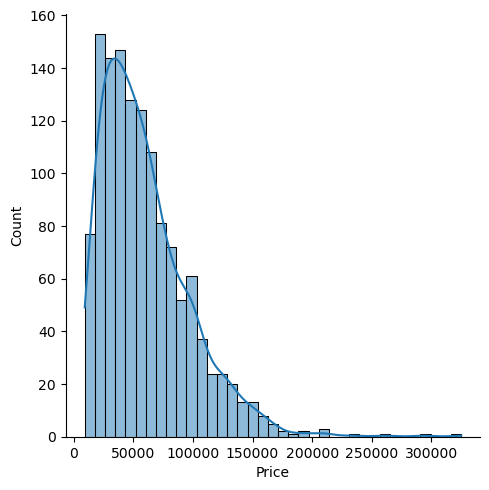

In [565]:
sns.displot(x=df['Price'], kde = True)

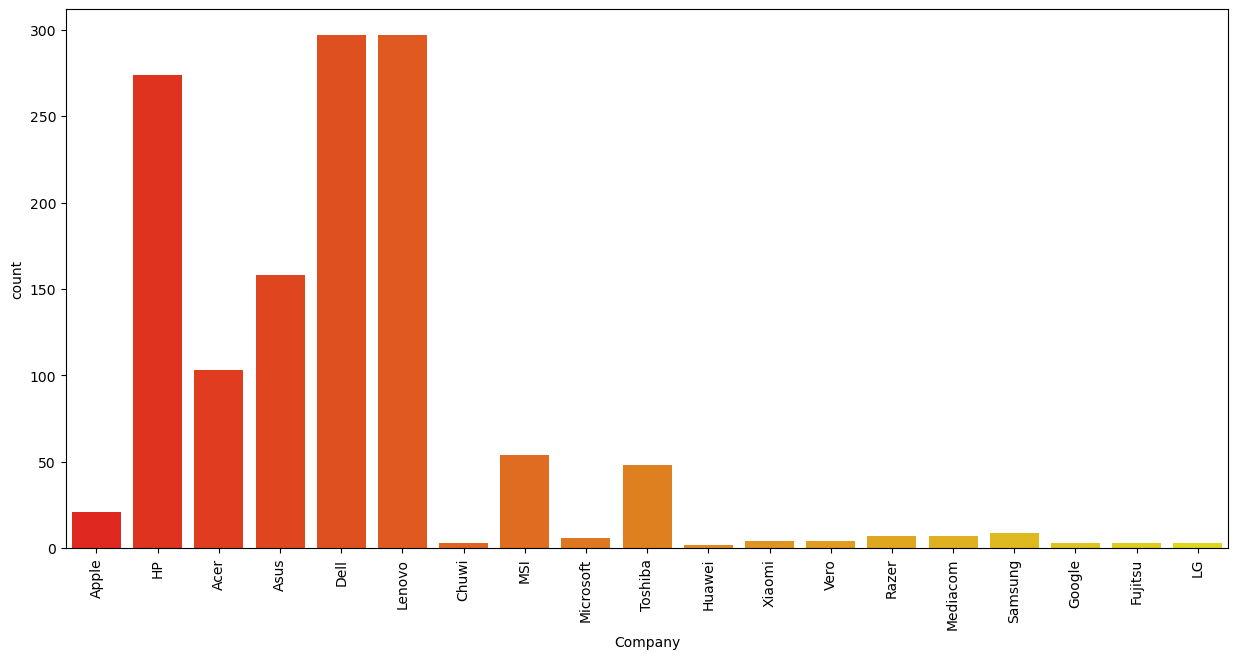

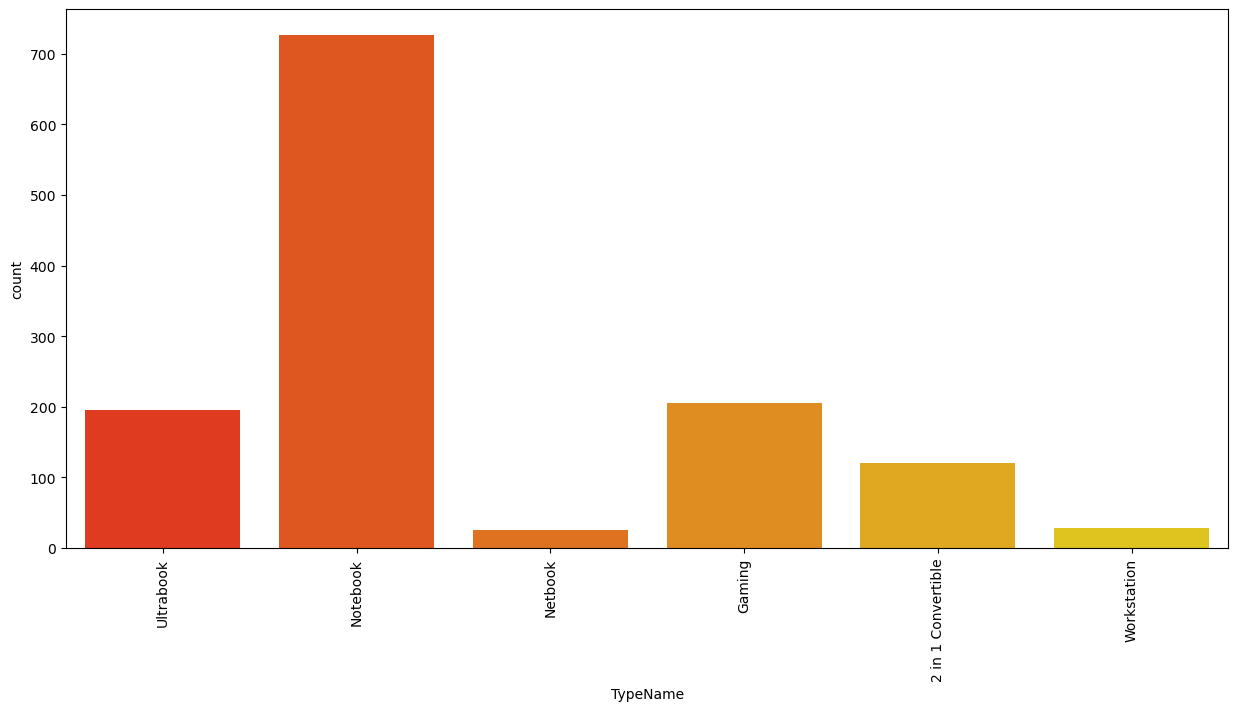

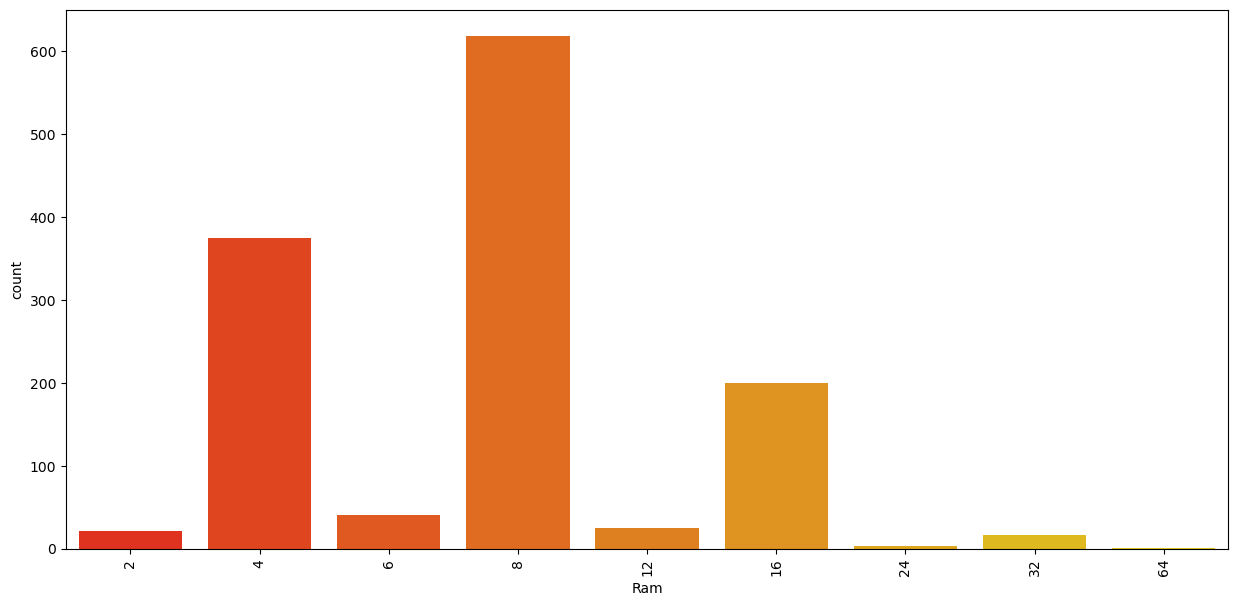

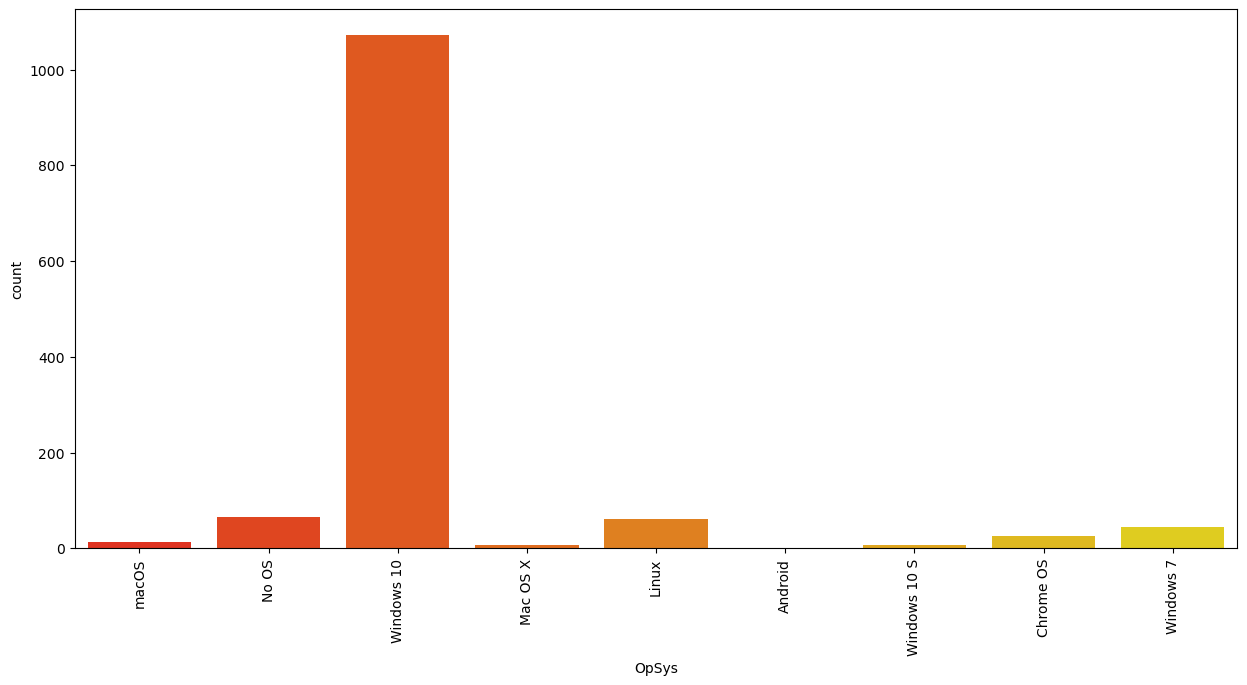

In [566]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(x=df[col],palette='autumn')
    plt.xticks(rotation='vertical')
                  
toview= ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview: 
    drawplot(col)

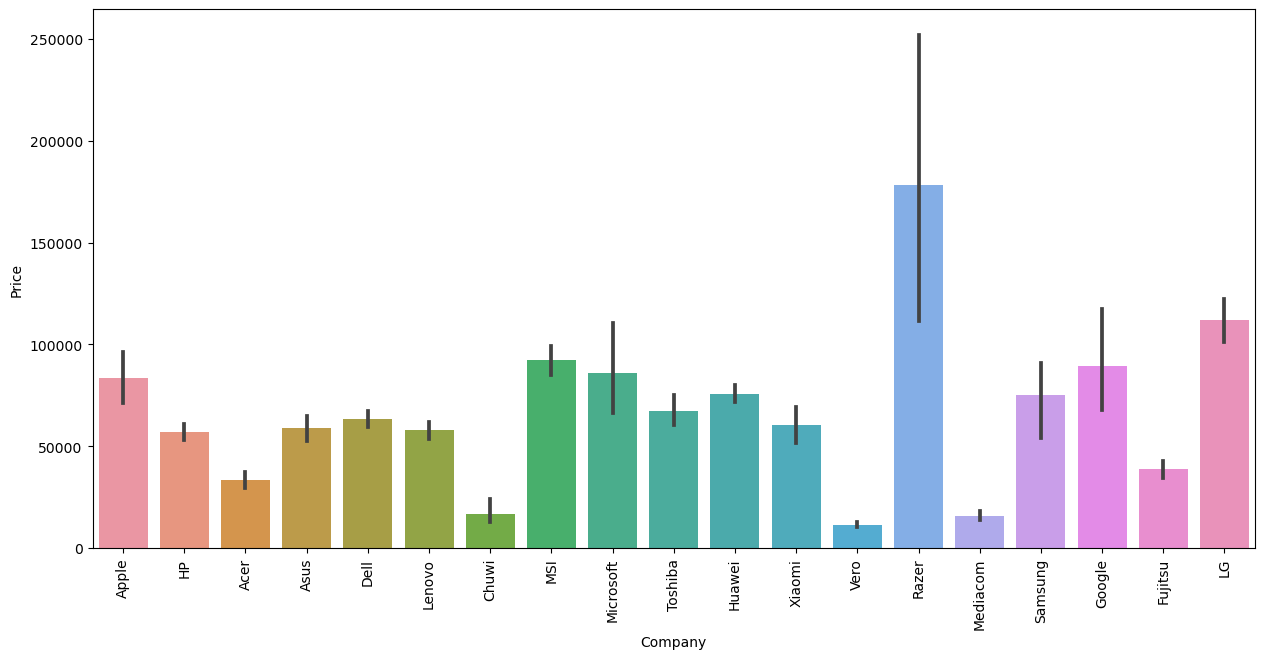

In [567]:
# avg price for each laptop brand
# this can show us the insight that as per company the price of the laptop vary

plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

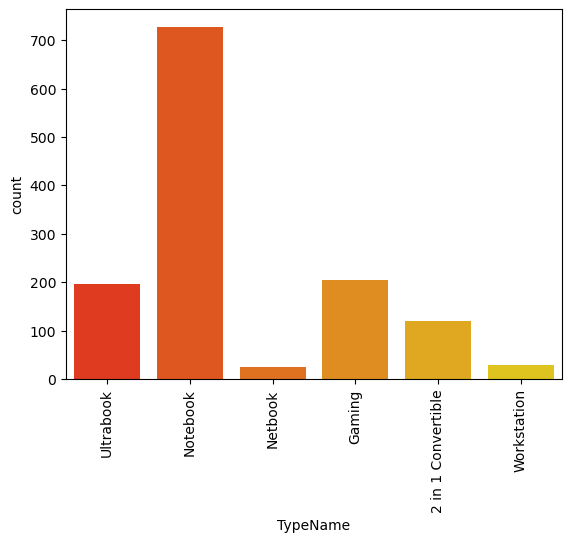

In [568]:
# various types of laptops

sns.countplot(x = df['TypeName'], palette='autumn')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

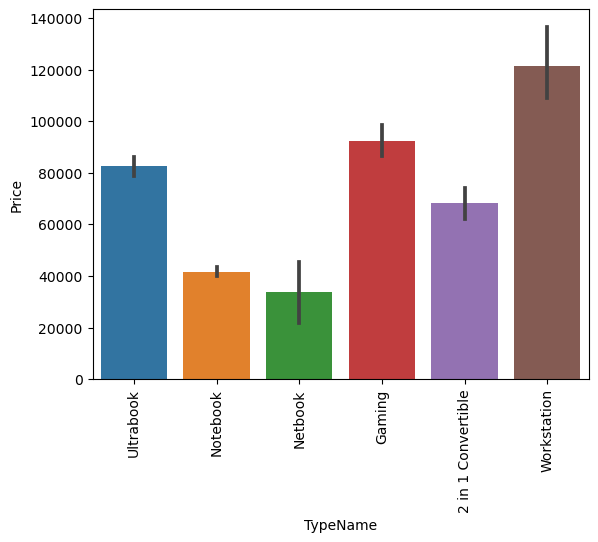

In [569]:
#  laptop type and variation about the price

sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

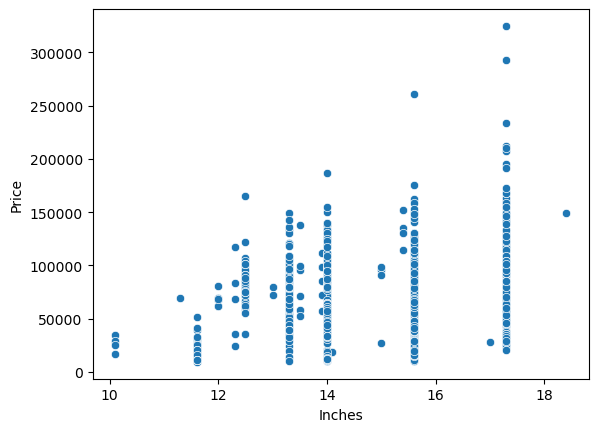

In [570]:
# variation of screen inches towards the price

sns.scatterplot(x = df['Inches'], y = df['Price'])

In [571]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [572]:
# creating a new col, touchsreen if the value is 1 that is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element: 1
                                                if 'Touchscreen'in element else 0)

df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

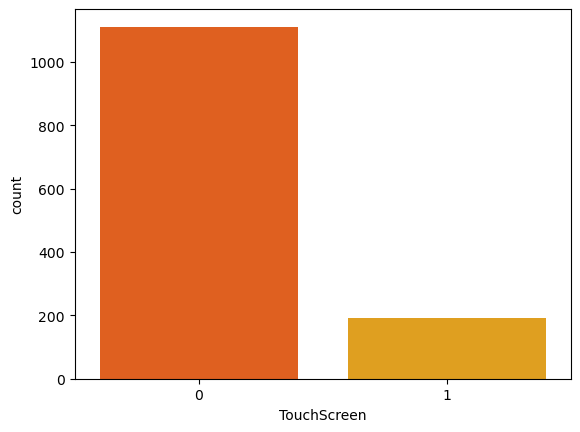

In [573]:
sns.countplot(x = df['TouchScreen'], palette='autumn')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

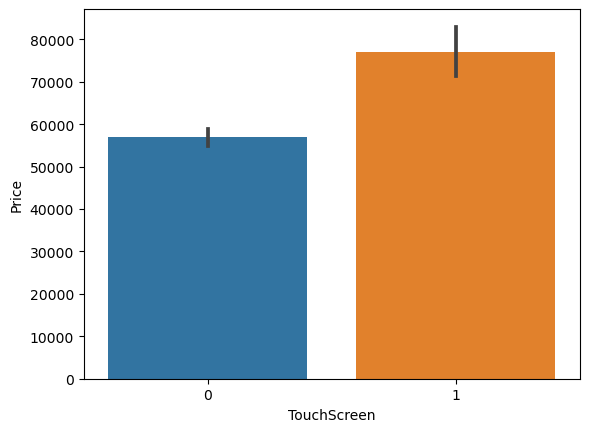

In [574]:
# touch screen on comparision with laptop price

sns.barplot(x = df['TouchScreen'], y = df['Price'])

In [575]:
# creating a new col, touchsreen if the value is 1 that is touch screen

df['IPS'] = df['ScreenResolution'].apply(lambda element: 1
                                                if 'IPS'in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:xlabel='IPS', ylabel='count'>

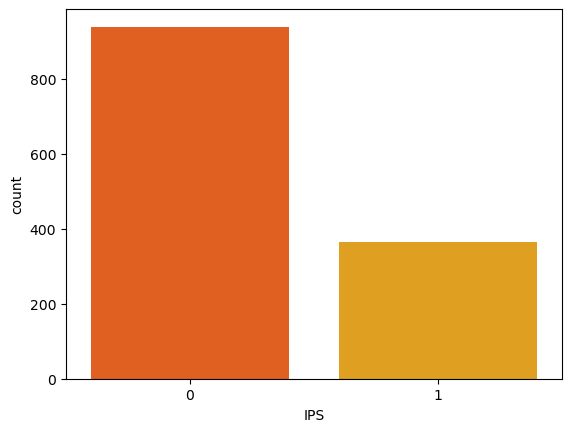

In [576]:
sns.countplot(x = df['IPS'], palette='autumn')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

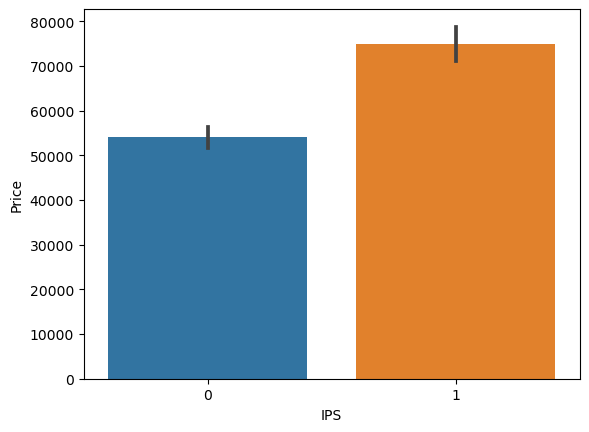

In [577]:
# touch scree on comparision with laptop price

sns.barplot(x = df['IPS'], y = df['Price'])

# Extracting the X Resolution and the Y Resolution

In [578]:
# We will split the text at the "x"letter and separete the 2 parts
# from this we can observe that on of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = df['ScreenResolution'].str.split('x', n=1, expand = True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [579]:
splitdf = df['ScreenResolution'].str.split('x', n=1, expand = True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [655]:
# we need to extract the digits from the col, if we do this we get exactly the numbers we are looking for
# frist replace ','for ''
# second, find all the numbers from that string as '\d+\.?\df'

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

KeyError: 'X_res'

In [ ]:
# Convert X_res and Y_res in to intergers

df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')


In [ ]:
# Correlation of dataframe variables with Price

df.corr()['Price']

In [ ]:
# Colinearity

df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()


In [ ]:
df.corr()['Price']

In [ ]:
# Correlation data shows that PPI has a good correlation with price, so we will be using it as a combination of 3 variables

df = df[['Company', 'TypeName','Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS', 'PPI']]
df.head()


In [ ]:
df['Cpu'].value_counts()

In [ ]:
# Most processors are made by intel, so we will be clustering their processor into different categories like i3, i5, other
# Other means the processor is not like i3 or i7, they are completely different 

df['CPU_name'] = df['Cpu'].apply(lambda text:' '.join(text.split()[:3]))
df.sample(10)

In [ ]:
def processortype(text):
    
    text = text.strip()
    
    if 'Intel Core i' in text:
        return text
    

    elif text.split()[0]=='Intel':
        return 'Other Intel Processor'
        
    else:
        return 'AMD Processor'
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.sample(10)

In [ ]:
sns.countplot(x=df['CPU_name'], palette= 'autumn')
plt.xticks(rotation='vertical')

In [ ]:
sns.barplot(x=df['CPU_name'],y=df['Price'])
plt.xticks(rotation = 'vertical')

In [ ]:
df.drop(columns=['Cpu'], inplace = True)
df.head()

In [ ]:
sns.countplot(x = df['Ram'], palette='autumn')
plt.xticks(rotation = True)

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [ ]:
df['Memory'].value_counts()

In [ ]:
# This expression will remove the decimal space for example

df['Memory']=df['Memory'].astype(str).replace('\.0','',regex = True)
   
# Replace the GB word with " "

df['Memory']=df['Memory'].str.replace('GB','')
   
# Replace TB word with "000"
   
df['Memory']=df['Memory'].str.replace('TB','000')

# Split the word across '+'caracter

newdf = df['Memory'].str.split('+', n=1, expand = True)
   
newdf

In [ ]:
# We will strip up all the white spaces

df['First']= newdf[0]
df['First']= df['First'].str.strip()
df.head()

In [ ]:
def applychanges(value):
    
    df['Layer1'+value] = df['First'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
for value in listtoapply:
    applychanges(value)
    
df.sample(10)

In [ ]:
# remove all characters and keep just the number
df['First']=df['First'].str.replace(r'\D','')
df['First'].value_counts()

In [ ]:
df['Second']=newdf[1]
df.head()

In [ ]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
df['Second'] = df['Second'].fillna('0')
for value in listtoapply:
    applychanges1(value)
    
# remove all characters keep just the numbers

df['Second']=df['Second'].str.replace(r'\D', '')
df['Second'].value_counts()

In [ ]:
df['First'] = df['First'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

In [ ]:
# multyplying the elements and staring the results in subsequent columns

df['HDD']= (df['First']*df['Layer1HDD']+df['Second']*df['Layer2HDD'])
df['SSD']= (df['First']*df['Layer1SSD']+df['Second']*df['Layer2SSD'])
df['Hybrid']= (df['First']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid'])
df['FlashStorage']= (df['First']*df['Layer1FlashStorage']+df['Second']*df['Layer2FlashStorage'])

df.drop(columns=['First', 'Second', 'Layer1HDD', 'Layer2HDD', 'Layer1SSD', 'Layer2SSD', 'Layer1Hybrid', 'Layer2Hybrid', 'Layer1FlashStorage', 'Layer2FlashStorage'], inplace = True)


df.sample(10)

In [ ]:
df.drop(columns=['Memory'], inplace= True)
df.head()

In [ ]:
df.corr()['Price']

In [ ]:
df.drop(columns = ['Hybrid', 'FlashStorage'], inplace = True)
df.head()

In [ ]:
df['Gpu'].value_counts()

In [ ]:
# Extracting brands
a = df['Gpu'].iloc[1]
a.split()[0]

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(x=df['Gpu brand'], palette = 'plasma')

In [ ]:
# removing arm

df = df[df['Gpu brand'] != 'ARM']
sns.countplot(x=df['Gpu brand'], palette='plasma')

In [ ]:
# price gpu analysis

sns.barplot(x = df['Gpu brand'], y = df['Price'], estimator =np.median)

In [ ]:
df = df.drop(columns=['Gpu'])
df.head()

In [ ]:
df['OpSys'].value_counts()

In [ ]:
sns.barplot(x=df['OpSys'], y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def setcategory(text):
    
    
    if text=='Windows 10' or text=='Windows 7'or text=='Windows 10 S':
        return 'Windows'
    

    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
        
    else:
        return 'Other'
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.sample(10)

In [ ]:
sns.countplot(x=df['OpSys'], palette='plasma')

In [ ]:
sns.barplot(x=df['OpSys'], y= df['Price'])
plt.xticks(rotation= 'vertical')

In [ ]:
sns.displot(df['Weight'])

In [ ]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

In [ ]:
# left skewed prob dist

sns.displot(df['Price'], kde = True)

In [ ]:
# if np.log is applied we can normalize the left skewed dist prob to a get gaussian prob dist

sns.displot(np.log(df['Price']), kde = True)

In [ ]:
df.corr()['Price']

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')

# Model building

In [ ]:
test = np.log(df['Price'])
train = df.drop(['Price'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

import xgboost as xgb

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size = 0.15, random_state = 2)

X_train.shape, X_test.shape


In [ ]:
# we need to get the index number of columns which have categorical data

mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

# Linear regression

In [ ]:
# we will apply one hot enconding on the columns with categorical data -> [0, 1, 3, 8, 11]
# the remainder we keep as passthrough i.e no other column must be effected
# except the ones undergoing the transformation


step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,3,8,11])], remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train, Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score', metrics.r2_score(Y_test,Y_pred))
print('MAE', metrics.mean_absolute_error(Y_test, Y_pred))

In [ ]:
## now mae is 0.21 so if you want to check how much difference is there do this

## we see there is a difference of 1.23 only as per the original value
## that is our model predicts +-0.21 more\less than original price

np.exp(0.21)

# Ridge regression 

In [ ]:
# we will apply one hot enconding on the columns with categorical data -> [0, 1, 3, 8, 11]
# the remainder we keep as passthrough i.e no other column must be effected
# except the ones undergoing the transformation

step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,3,8,11])], remainder = 'passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train, Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, Y_pred))
print('MAE', metrics.mean_absolute_error(Y_test, Y_pred))

# Lasso reg

In [ ]:
# we will apply one hot enconding on the columns with categorical data -> [0, 1, 3, 8, 11]
# the remainder we keep as passthrough i.e no other column must be effected
# except the ones undergoing the transformation

step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,3,8,11])], remainder = 'passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train, Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, Y_pred))
print('MAE', metrics.mean_absolute_error(Y_test, Y_pred))


# Decision tree

In [ ]:
# we will apply one hot enconding on the columns with categorical data -> [0, 1, 3, 8, 11]
# the remainder we keep as passthrough i.e no other column must be effected
# except the ones undergoing the transformation

dt = DecisionTreeRegressor

step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,3,8,11])], remainder = 'passthrough')

step2 = dt(max_depth=8)

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train, Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, Y_pred))
print('MAE', metrics.mean_absolute_error(Y_test, Y_pred))


# Random Forest

In [ ]:
# we will apply one hot enconding on the columns with categorical data -> [0, 1, 3, 8, 11]
# the remainder we keep as passthrough i.e no other column must be effected
# except the ones undergoing the transformation

rf = RandomForestRegressor

step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,3,8,11])], remainder = 'passthrough')

step2 = rf(random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train, Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, Y_pred))
print('MAE', metrics.mean_absolute_error(Y_test, Y_pred))


In [ ]:
import pickle

pickle.dump(df, open('df.pk1', 'wb'))
pickle.dump(pipe, open('pipe.pk1', 'wb'))

In [ ]:
train.head()

In [ ]:
train.to_csv('traineddata.csv', index=None)

In [ ]:
# As we can see, RandomForest gave us the best R2 score, so we will do a hyperparameter tuning (optimization) for the RandomForest

# Hyperparameter tuning

In [ ]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
        if key in indexlist:
            transformlist.append(value)
            
transformlist

In [ ]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)

train.head()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train,test,test_size=0.15, random_state=2)

X_train.shape, X_test.shape

In [ ]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, Y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [ ]:
path= reg.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
alphalist = []
for alpha in ccp_alphas:
        reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
        reg.fit(X_train, Y_train)
        alphalist.append(reg)

In [ ]:
train_score = [reg.score(X_train, Y_train) for reg in alphalist]
test_score = [reg.score(X_train, Y_train) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('accuracy')

plt.plot(ccp_alphas, train_score, marker = 'o',
         label = 'training', color = 'blue')
plt.plot(ccp_alphas, test_score, marker = '+',
         label = 'test', color = 'red', drawstyle = 'steps-post')
plt.legend()
plt.show()

In [ ]:
# possible values of alpha lie between [0.0025, 0.0075]

In [ ]:
reg = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0085)
reg.fit(X_train, Y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [ ]:
params= {
    
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["squared_error","absolute_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['sqrt', 'log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
            
        }
    },
    'Decision Tree':{
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion':["squared_error","absolute_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['sqrt', 'log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }       
    }
}

In [ ]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'], cv = 5,
                            n_iter=10, scoring='neg_mean_squared_error', verbose=2)
    clf.fit(X_train, Y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

In [ ]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score', 'best_estimator'])
scores_df

In [ ]:
scores

In [ ]:
RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf = 14, min_samples_split=5, n_estimators=1200)


In [ ]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=15, max_features= 'log2',
                           min_samples_leaf = 2, min_samples_split=14, n_estimators=1077)

rf.fit(X_train, Y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(Y_test,Y_pred))

# Prediction on the whole data set

In [657]:
train

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [656]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

/Users/JorgeArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/JorgeArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/JorgeArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/JorgeArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/JorgeArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

[array([11.14148515]),
 array([10.97918255]),
 array([10.70314175]),
 array([11.43487213]),
 array([11.19247463]),
 array([10.20014155]),
 array([11.21839135]),
 array([10.97918255]),
 array([11.43362219]),
 array([11.08122923]),
 array([10.27886791]),
 array([10.17060293]),
 array([11.3782052]),
 array([10.37994357]),
 array([11.13295929]),
 array([11.19247463]),
 array([10.95397419]),
 array([11.43487213]),
 array([10.45626684]),
 array([11.10269326]),
 array([9.84711114]),
 array([11.00877609]),
 array([10.12793633]),
 array([11.0617215]),
 array([11.16392221]),
 array([10.22250464]),
 array([10.97918255]),
 array([10.83791525]),
 array([11.23613893]),
 array([10.69428914]),
 array([9.88916591]),
 array([10.11556084]),
 array([10.30510396]),
 array([11.44213807]),
 array([10.97918255]),
 array([9.84603732]),
 array([10.11739652]),
 array([10.79737445]),
 array([10.44223403]),
 array([10.85974045]),
 array([10.1653244]),
 array([11.38270529]),
 array([10.46085955]),
 array([10.640016